## balanced_profolio

In [1]:
import pandas as pd
import numpy as np
import math

In [223]:
path = '/Users/anubhanagar/Desktop/APlusBernstein-Project/data/pred/lstm_preds.csv'
#path = '/Users/yutingmei/APlusBernstein-Project/data/pred/lstm_preds.csv'
target = pd.read_csv(path)

In [224]:
target = target.iloc[1: , :]
target = target.reset_index(drop=True)

In [118]:
target

,sc,mom,value,.pred_prob_sc_lstm,.pred_prob_mom_lstm,.pred_prob_value_lstm,.pred_sc_lstm,.pred_mom_lstm,.pred_value_lstm,s_&_p_500_ret,sc_1d_fwd_ret,mom_1d_fwd_ret,value_1d_fwd_ret
0,0,0,1,0.507404,0.537511,0.537511,1,1,0,-0.000333,-0.008109,-0.002763,-0.001990
1,1,1,1,0.513883,0.548627,0.548627,1,1,0,-0.002512,0.008351,0.009081,0.006174
2,1,1,1,0.525089,0.551225,0.551225,1,1,0,0.006082,0.001307,0.007427,0.001928
3,0,1,1,0.535904,0.556041,0.556041,1,1,0,-0.000212,0.000261,0.001359,0.002828
4,1,1,0,0.517375,0.554009,0.554009,1,1,0,0.000348,0.005483,0.003284,0.000307
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1,0,0,0.473095,0.508067,0.508067,0,1,0,-0.000215,0.001707,-0.004040,-0.002439
1841,0,0,0,0.475162,0.510649,0.510649,0,1,0,-0.000846,-0.003714,-0.004661,0.006674
1842,0,0,0,0.484604,0.517438,0.517438,0,1,0,0.006763,-0.013597,-0.007605,-0.009775
1843,1,0,1,0.492156,0.528105,0.528105,0,1,0,-0.007195,0.004891,-0.007206,0.008705


In [221]:

def balanced_profolio(target):
    #target_ = target.iloc[:, 1:4]
    # target = target.iloc[:, -3:]#the return values
    start = 100000
    #s_p = target.iloc[:, 4]
    s_p = target.iloc[:, -4]#s&p
    #s_p = target["s_&_p_500_ret"]
    real = target.iloc[:, 0:3]#real values in 1 or 0
    compare_result = []
    pred = target.iloc[:,6:9]
    op = target.iloc[:,-3:]
#     long = []
#     short = []
    total_list = []
#     direct = []
    for i in range(target.shape[0]):
        row = op.iloc[i, :]
        if pred.iloc[i,:].sum() >= 2:
            # pred direction
            op_invest = 1
            op_s_p = -1
        else:
            op_invest = -1
            op_s_p = 1
        add = sum(list(map(lambda x: (start / 3) * (1 + op_invest * x), row)))
        total = (add) + ((1 + (op_s_p * s_p[i])) * start)
        total_list.append(total)
        compare_result.append((total - (start * 2)) / (start * 2))
        start = total / 2 
    return compare_result, total_list

In [225]:
result, total = balanced_profolio(target)

In [233]:
result = pd.DataFrame(result, columns = ['Return'])

In [216]:
result[result['Return'].isnull()].index.tolist()

[]

In [147]:
[i for i in range(len(direct)) if direct[i] != 2]

[25,
 29,
 38,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 52,
 55,
 59,
 60,
 62,
 65,
 71,
 72,
 73,
 79,
 82,
 83,
 84,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 121,
 123,
 124,
 125,
 127,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 152,
 153,
 154,
 155,
 158,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,


In [127]:
long[236]

-0.0

In [142]:
target.iloc[25:,:]

,sc,mom,value,.pred_prob_sc_lstm,.pred_prob_mom_lstm,.pred_prob_value_lstm,.pred_sc_lstm,.pred_mom_lstm,.pred_value_lstm,s_&_p_500_ret,sc_1d_fwd_ret,mom_1d_fwd_ret,value_1d_fwd_ret
25,0,1,1,0.495580,0.565397,0.565397,0,1,0,0.001569,0.008916,0.012618,0.012571
26,1,1,1,0.501208,0.562359,0.562359,1,1,0,0.011062,0.003927,0.000293,0.000573
27,1,1,0,0.504559,0.567614,0.567614,1,1,0,-0.000269,0.012715,0.010641,0.004172
28,0,0,1,0.508853,0.562988,0.562988,1,1,0,0.005810,0.001405,0.002584,0.007115
29,1,1,0,0.494503,0.554736,0.554736,0,1,0,0.004809,0.010433,0.007332,0.000331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1,0,0,0.473095,0.508067,0.508067,0,1,0,-0.000215,0.001707,-0.004040,-0.002439
1841,0,0,0,0.475162,0.510649,0.510649,0,1,0,-0.000846,-0.003714,-0.004661,0.006674
1842,0,0,0,0.484604,0.517438,0.517438,0,1,0,0.006763,-0.013597,-0.007605,-0.009775
1843,1,0,1,0.492156,0.528105,0.528105,0,1,0,-0.007195,0.004891,-0.007206,0.008705


In [139]:
total.index(-980.0910567895044)

25

In [235]:
total = pd.DataFrame(total, columns = ['total_returns'])

In [236]:
total

,total_returns
0,199604.595203
1,200640.612126
2,200387.032253
3,200556.866875
4,200825.261076
...,...
1840,156889.963328
1841,156868.099957
1842,158208.406607
1843,157470.775902


In [129]:
long[235]

-1.4e-322

In [128]:
short[236]

0.0

In [130]:
short[235]

-1.33e-322

In [218]:
import pandas as pd 
import statistics
import numpy as np

In [219]:
ret = balanced_profolio(target)
Net_return = pd.DataFrame(ret, columns = ['Returns'])
#df.append(ret)
ret = balanced_profolio(target)
Net_return

,Returns
0,-0.001977
1,0.005190
2,-0.001264
3,0.000848
4,0.001338
...,...
1840,0.000688
1841,-0.000139
1842,0.008544
1843,-0.004662


In [31]:
#pip install pyfolio

In [32]:
#pip install quantrocket-client

<AxesSubplot:ylabel='Returns'>

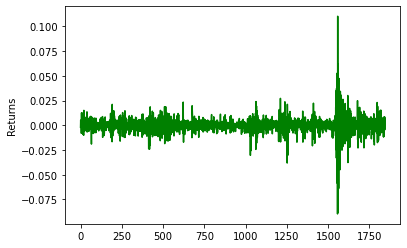

In [220]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
from quantrocket.zipline import ZiplineBacktestResult
#plot net returns 
pf.plotting.plot_returns(Net_return['Returns'])

In [228]:
Net_return

,Returns
0,-0.001977
1,0.005190
2,-0.001264
3,0.000848
4,0.001338
...,...
1840,0.000688
1841,-0.000139
1842,0.008544
1843,-0.004662


In [115]:
target.iloc[236:,:]

,sc,mom,value,.pred_prob_sc_lstm,.pred_prob_mom_lstm,.pred_prob_value_lstm,.pred_sc_lstm,.pred_mom_lstm,.pred_value_lstm,s_&_p_500_ret,sc_1d_fwd_ret,mom_1d_fwd_ret,value_1d_fwd_ret
236,0,1,1,0.463443,0.541472,0.541472,0,1,0,-0.016351,0.003977,0.005588,0.005920
237,1,1,0,0.459814,0.538962,0.538962,0,1,0,0.004536,-0.012143,-0.012564,-0.018442
238,0,0,1,0.459834,0.546766,0.546766,0,1,0,-0.016214,-0.010113,-0.006442,-0.006034
239,1,0,1,0.456337,0.541049,0.541049,0,1,0,-0.006343,-0.001409,-0.011207,-0.007803
240,1,0,1,0.468463,0.535137,0.535137,0,1,0,-0.008489,0.030867,0.018428,0.021599
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1,0,0,0.473095,0.508067,0.508067,0,1,0,-0.000215,0.001707,-0.004040,-0.002439
1841,0,0,0,0.475162,0.510649,0.510649,0,1,0,-0.000846,-0.003714,-0.004661,0.006674
1842,0,0,0,0.484604,0.517438,0.517438,0,1,0,0.006763,-0.013597,-0.007605,-0.009775
1843,1,0,1,0.492156,0.528105,0.528105,0,1,0,-0.007195,0.004891,-0.007206,0.008705


In [109]:
Net_return[Net_return['Returns'].isnull()].index.tolist()

[236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402

In [ ]:
#JESSICA CHECK: these 4 

In [229]:

#performance metrics 
# Average of returns or mean daily average 
Average_daily_ret = statistics.mean(Net_return["Returns"])
print(Average_daily_ret)

-8.62190152528318e-05


In [230]:
#Holding period returns
HPR = (Net_return['Returns'].iat[-1] - Net_return['Returns'].iat[0])/Net_return['Returns'].iat[0]
HPR

-4.522910454458784

In [231]:
#volatility of returns 
vol = statistics.stdev(Net_return["Returns"])
vol

0.008893068995376487

In [232]:
#Sharpe Ratio 
#risk_free_rate = 0.05
def sharpe_ratio(HPR, risk_free_rate, vol):
    
    return (HPR - risk_free_rate) / vol*(np.sqrt(252))
sharpe_ratio(HPR = HPR,risk_free_rate= 0.05, vol = vol )

-8162.840411935724

In [ ]:
#END OF CHECKING 

In [58]:
#understanding s&p trend 
#this is invest in s&p and let it go for the entire time period 
#let the s&p run for the entire trend our model should do better than that 
#here its previous start*s&p and then that value is multiplied to next s&p and so on
s_p = target.iloc[:, 9]
#s_p = s_p.iloc[1: , :]

In [41]:
s_p = target.iloc[:, 9]
start = 100000
value = 0
s_p_ret = []
for i in s_p:
    start = i*start
    s_p_ret.append(start)
    

In [42]:
s_p_ret

[-33.29730673916,
 0.08363553569192875,
 0.0005086523216044466,
 -1.0793653852575197e-07,
 -3.7594427537825796e-11,
 -8.671877003278919e-14,
 1.090591955828476e-15,
 1.1797960472023204e-17,
 6.0950483165959e-20,
 -8.21079556602132e-23,
 3.1982198354015296e-25,
 8.870898548184704e-28,
 5.099876592403525e-31,
 -4.533567648245196e-33,
 9.464044995981277e-35,
 -4.6149569519416866e-37,
 -2.8339000120255362e-39,
 2.8931866231557485e-41,
 3.2597678163050273e-43,
 -2.1075419364246968e-45,
 4.811928531658132e-47,
 3.676854953893163e-49,
 -7.457613739664341e-52,
 -9.277100510794754e-54,
 -1.2340312335397806e-55,
 -1.936521618335982e-58,
 -2.1421984965924304e-60,
 5.768249832834344e-64,
 3.351384669209345e-66,
 1.6117445385113475e-68,
 1.867159715129764e-71,
 -1.218224438748584e-73,
 -7.347650340066455e-76,
 1.409799307549502e-78,
 8.721753646704859e-81,
 -1.1754194110387841e-83,
 -2.5481690319230884e-88,
 -1.2608545200121875e-90,
 -3.508625578125712e-93,
 2.5888484730368855e-95,
 3.9525689006614

In [43]:
Net = pd.DataFrame(s_p_ret, columns = ['Returns'])

In [44]:
Net

,Returns
0,-3.329731e+01
1,8.363554e-02
2,5.086523e-04
3,-1.079365e-07
4,-3.759443e-11
...,...
1840,0.000000e+00
1841,-0.000000e+00
1842,-0.000000e+00
1843,0.000000e+00


In [45]:
#performance metrics 
# Average of returns or mean daily average 
Average_daily_ret = statistics.mean(Net["Returns"])
print(Average_daily_ret)

-0.018001714178385194


In [46]:
#Holding period returns
HPR = (Net['Returns'].iat[-1] - Net['Returns'].iat[0])/Net['Returns'].iat[0]
HPR

-1.0

In [47]:
#volatility of returns 
vol = statistics.stdev(Net["Returns"])
vol

0.7751984342497008

In [48]:
#Sharpe Ratio 
#risk_free_rate = 0.05
def sharpe_ratio(HPR, risk_free_rate, vol):
    
    return (HPR - risk_free_rate) / vol*(np.sqrt(252))
sharpe_ratio(HPR = HPR,risk_free_rate= 0.05, vol = vol )

-21.501892319790063